In [1]:
import numpy as np
import os, sys
from matplotlib import pyplot as plt
import pickle
import pandas as pd
%matplotlib inline

In [2]:
song_id='1130289'

results_path = './experiment-files/results/onsets/'

hop_sizes = ['256', '512', '1024', '2048']
novelties = ['energy', 'energy_compressed', 'spectral', 'spectral_librosa', 'phase', 'complex']

In [3]:
def compare_parameters(song_id, flat=False):
    table = {}
    table['F-measure'] = {}
    table['Precision'] = {}
    table['Recall'] = {}
    for novelty in novelties:
        if not flat:
            table['F-measure'][novelty] = {}
            table['Precision'][novelty] = {}
            table['Recall'][novelty] = {}
        for h in hop_sizes:
            with open(results_path+song_id+'-'+novelty+'-'+h+'.pickle', 'rb') as file:
                results = pickle.load(file)
                #print(results)
                if flat:
                    table['F-measure'][novelty+h] = results['scores']['F-measure']
                    table['Precision'][novelty+h] = results['scores']['Precision']
                    table['Recall'][novelty+h] = results['scores']['Recall']
                else:
                    table['F-measure'][novelty][h] = results['scores']['F-measure']
                    table['Precision'][novelty][h] = results['scores']['Precision']
                    table['Recall'][novelty][h] = results['scores']['Recall']
    return table

In [4]:
def compare_parameters_512(song_id):
    table = {}
    table['F-measure'] = {}
    table['Precision'] = {}
    table['Recall'] = {}
    for novelty in novelties:
        table['F-measure'][novelty] = {}
        table['Precision'][novelty] = {}
        table['Recall'][novelty] = {}
        with open(results_path+song_id+'-'+novelty+'.pickle', 'rb') as file:
            results = pickle.load(file)
            #print(results)
            table['F-measure'][novelty] = results['scores']['F-measure']
            table['Precision'][novelty] = results['scores']['Precision']
            table['Recall'][novelty] = results['scores']['Recall']
    return table

In [5]:
def compare_all(song_ids):
    table = {}
    table['F-measure'] = {}
    table['Precision'] = {}
    table['Recall'] = {}
    for song_id in song_ids:
        row = compare_parameters(song_id, True)
        table['F-measure'][song_id] = row['F-measure']
        table['Precision'][song_id] = row['Precision']
        table['Recall'][song_id] = row['Recall']
    return table

def compare_attribute(song_ids, attribute='F-measure'):
    table = {}
    for song_id in song_ids:
        row = compare_parameters(song_id, True)
        table[song_id] = row[attribute]
    return table

def compare_attribute_512(song_ids, attribute='F-measure'):
    table = {}
    for song_id in song_ids:
        row = compare_parameters_512(song_id)
        table[song_id] = row[attribute]
    return table
    

In [32]:
song_ids = [file.split('-')[0] for file in os.listdir(results_path)]
tf = compare_attribute(song_ids)
tpr = compare_attribute(song_ids, 'Precision')
tre = compare_attribute(song_ids, 'Recall')

In [7]:
song_ids = [file.split('-')[0] for file in os.listdir(results_path)]
tf_all = compare_attribute(song_ids)
df_all = pd.DataFrame(tf_all)

In [8]:
df_all = df_all.transpose()

In [9]:
df_all.describe()

energy256  energy512  energy1024  energy2048  energy_compressed256  \
count  77.000000  77.000000   77.000000   77.000000             77.000000   
mean    0.259095   0.574034    0.311641    0.187635              0.194145   
std     0.090938   0.122269    0.116782    0.083465              0.095871   
min     0.028125   0.187135    0.069825    0.022676              0.000000   
25%     0.207955   0.504587    0.229462    0.113712              0.113537   
50%     0.272941   0.573604    0.309783    0.183422              0.203187   
75%     0.322430   0.645194    0.399737    0.242105              0.264840   
max     0.461420   0.816000    0.538889    0.355482              0.386150   

       energy_compressed512  energy_compressed1024  energy_compressed2048  \
count             77.000000              77.000000              77.000000   
mean               0.465421               0.263294               0.154718   
std                0.147356               0.104801               0.073278   
min                0.081301               0.046589               0.006873   
25%                0.384342               0.182609               0.100396   
50%                0.478947               0.251656               0.137931   
75%                0.576271               0.335232               0.205455   
max                0.778835               0.504338               0.329293   

       spectral256  spectral512  ...  spectral_librosa1024  \
count    77.000000    77.000000  ...             77.000000   
mean      0.267791     0.533510  ...              0.281968   
std       0.080594     0.123933  ...              0.098462   
min       0.042553     0.274336  ...              0.062630   
25%       0.205217     0.448549  ...              0.212014   
50%       0.264769     0.540360  ...              0.291697   
75%       0.337592     0.605438  ...              0.351526   
max       0.418232     0.783848  ...              0.495202   

       spectral_librosa2048   phase256   phase512  phase1024  phase2048  \
count             77.000000  77.000000  77.000000  77.000000  77.000000   
mean               0.164829   0.270947   0.397891   0.180450   0.095673   
std                0.076232   0.087083   0.100807   0.069745   0.051939   
min                0.017007   0.091082   0.171429   0.054878   0.006472   
25%                0.100000   0.215429   0.344828   0.127820   0.061602   
50%                0.160858   0.264901   0.389294   0.191321   0.093750   
75%                0.218391   0.332158   0.454167   0.234568   0.119641   
max                0.345833   0.472847   0.665928   0.404858   0.373057   

       complex256  complex512  complex1024  complex2048  
count   77.000000   77.000000    77.000000    77.000000  
mean     0.266533    0.565923     0.309823     0.185908  
std      0.087938    0.123129     0.106608     0.079272  
min      0.000000    0.222930     0.052288     0.023599  
25%      0.203233    0.492268     0.225352     0.121212  
50%      0.281857    0.556984     0.312950     0.192771  
75%      0.327295    0.676056     0.385185     0.250000  
max      0.472406    0.807634     0.535849     0.327808  

[8 rows x 24 columns]

In [22]:
df_all.transpose().sum(axis='columns').sort_values()/len(df_all.columns)

phase2048                0.306951
energy_compressed2048    0.496386
spectral_librosa2048     0.528828
spectral2048             0.560508
phase1024                0.578945
complex2048              0.596455
energy2048               0.601996
energy_compressed256     0.622882
spectral_librosa256      0.699810
energy256                0.831263
energy_compressed1024    0.844735
complex256               0.855126
spectral256              0.859161
phase256                 0.869288
spectral_librosa1024     0.904648
spectral1024             0.935375
complex1024              0.994015
energy1024               0.999850
phase512                 1.276568
energy_compressed512     1.493225
spectral512              1.711677
spectral_librosa512      1.712021
complex512               1.815668
energy512                1.841693
dtype: float64

In [23]:
df_f = pd.DataFrame(tf)
df_pr = pd.DataFrame(tpr)
df_re = pd.DataFrame(tre)

In [24]:
df_f = df_f.transpose()

In [25]:
df_f.head()

energy256  energy512  energy1024  energy2048  energy_compressed256  \
783718   0.168981   0.433333    0.212038    0.148410              0.147472   
544412   0.235294   0.630319    0.305085    0.141561              0.113537   
22809    0.171674   0.545872    0.332394    0.222222              0.077295   
164898   0.345904   0.629800    0.438662    0.287059              0.335155   
933600   0.404218   0.799242    0.486002    0.315202              0.333797   

        energy_compressed512  energy_compressed1024  energy_compressed2048  \
783718              0.437257               0.218266               0.171891   
544412              0.500000               0.287695               0.136000   
22809               0.416357               0.314516               0.159509   
164898              0.629565               0.465632               0.284960   
933600              0.570637               0.325342               0.127660   

        spectral256  spectral512  ...  spectral_librosa1024  \
783718     0.177073     0.437683  ...              0.212014   
544412     0.261084     0.554896  ...              0.294872   
22809      0.157248     0.474359  ...              0.308271   
164898     0.315545     0.475962  ...              0.369565   
933600     0.340828     0.607662  ...              0.221416   

        spectral_librosa2048  phase256  phase512  phase1024  phase2048  \
783718              0.164332  0.188658  0.350877   0.128065   0.098361   
544412              0.138318  0.215429  0.390764   0.195228   0.076555   
22809               0.196721  0.218623  0.366906   0.284314   0.214286   
164898              0.253687  0.297735  0.389294   0.206452   0.144404   
933600              0.150000  0.429642  0.444126   0.248227   0.143939   

        complex256  complex512  complex1024  complex2048  
783718    0.147597    0.454718     0.193208     0.166503  
544412    0.319007    0.606557     0.294385     0.131868  
22809     0.184900    0.491935     0.326316     0.229885  
164898    0.320574    0.576471     0.426877     0.272000  
933600    0.341224    0.676757     0.431217     0.292063  

[5 rows x 24 columns]

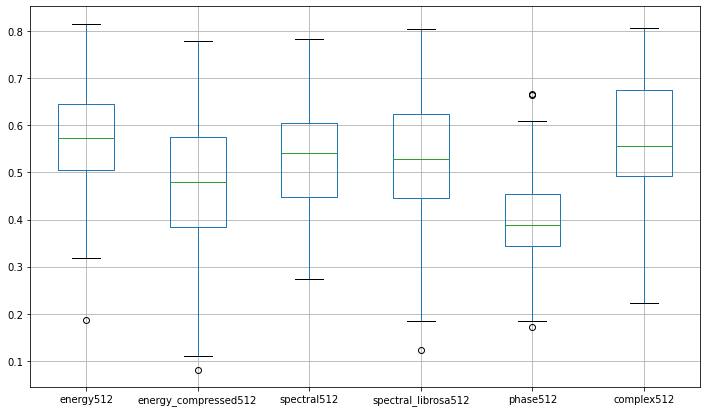

In [86]:
df_f.boxplot(figsize=(12,7))

In [87]:
df_f.describe()

energy512  energy_compressed512  spectral512  spectral_librosa512  \
count  77.000000             77.000000    77.000000            77.000000   
mean    0.574034              0.465421     0.533510             0.533617   
std     0.122269              0.147356     0.123933             0.150047   
min     0.187135              0.081301     0.274336             0.123810   
25%     0.504587              0.384342     0.448549             0.444761   
50%     0.573604              0.478947     0.540360             0.527700   
75%     0.645194              0.576271     0.605438             0.624434   
max     0.816000              0.778835     0.783848             0.804069   

        phase512  complex512  
count  77.000000   77.000000  
mean    0.397891    0.565923  
std     0.100807    0.123129  
min     0.171429    0.222930  
25%     0.344828    0.492268  
50%     0.389294    0.556984  
75%     0.454167    0.676056  
max     0.665928    0.807634

In [89]:
df_pr = df_pr.transpose()
df_pr.describe()

energy512  energy_compressed512  spectral512  spectral_librosa512  \
count  77.000000             77.000000    77.000000            77.000000   
mean    0.544959              0.554951     0.540596             0.562085   
std     0.163080              0.184972     0.174740             0.186595   
min     0.154217              0.108696     0.187611             0.149758   
25%     0.438247              0.443038     0.394387             0.431217   
50%     0.551724              0.562500     0.552239             0.559814   
75%     0.632692              0.663564     0.633094             0.687092   
max     0.977507              0.971510     0.946454             0.964506   

        phase512  complex512  
count  77.000000   77.000000  
mean    0.488976    0.498750  
std     0.152260    0.163644  
min     0.159744    0.165997  
25%     0.416667    0.388206  
50%     0.500000    0.489960  
75%     0.568579    0.598527  
max     0.880228    0.908911

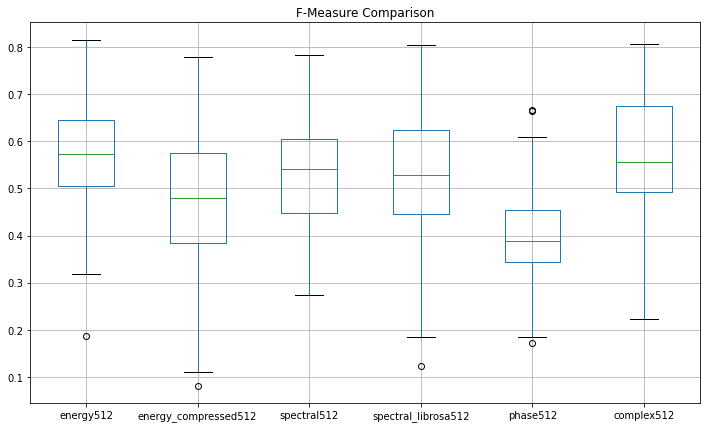

In [132]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(title='F-Measure Comparison')
df_f.boxplot(ax=ax)

In [104]:
df_f.describe()

energy512  energy_compressed512  spectral512  spectral_librosa512  \
count  77.000000             77.000000    77.000000            77.000000   
mean    0.574034              0.465421     0.533510             0.533617   
std     0.122269              0.147356     0.123933             0.150047   
min     0.187135              0.081301     0.274336             0.123810   
25%     0.504587              0.384342     0.448549             0.444761   
50%     0.573604              0.478947     0.540360             0.527700   
75%     0.645194              0.576271     0.605438             0.624434   
max     0.816000              0.778835     0.783848             0.804069   

        phase512  complex512  
count  77.000000   77.000000  
mean    0.397891    0.565923  
std     0.100807    0.123129  
min     0.171429    0.222930  
25%     0.344828    0.492268  
50%     0.389294    0.556984  
75%     0.454167    0.676056  
max     0.665928    0.807634

In [90]:
df_re = df_re.transpose()
df_re.describe()

energy512  energy_compressed512  spectral512  spectral_librosa512  \
count  77.000000             77.000000    77.000000            77.000000   
mean    0.663652              0.466331     0.595008             0.595738   
std     0.149656              0.192769     0.175123             0.216985   
min     0.237918              0.063380     0.197201             0.067474   
25%     0.606667              0.345196     0.490405             0.468215   
50%     0.672727              0.479873     0.587278             0.602071   
75%     0.765903              0.591748     0.726054             0.760000   
max     0.944444              0.906780     0.961039             0.974576   

        phase512  complex512  
count  77.000000   77.000000  
mean    0.373665    0.712678  
std     0.137959    0.130335  
min     0.103806    0.260223  
25%     0.278716    0.638197  
50%     0.339744    0.726190  
75%     0.440559    0.790842  
max     0.806667    0.968254

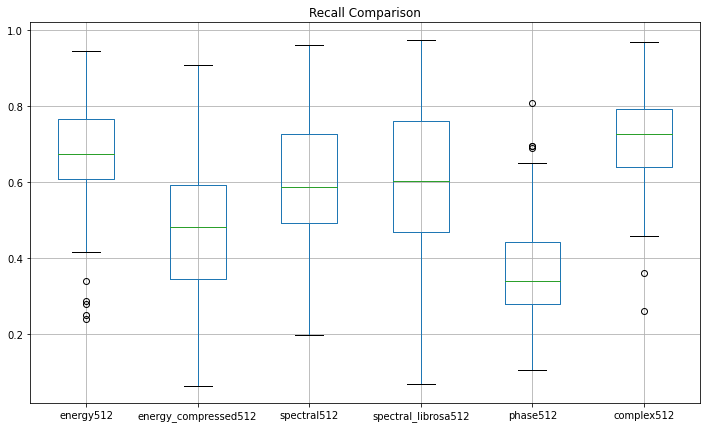

In [133]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(title='Recall Comparison')
df_re.boxplot(ax=ax)

In [35]:
df_f.head()

783718    544412     22809    164898    933600  \
energy512             0.433333  0.630319  0.545872  0.629800  0.799242   
energy_compressed512  0.437257  0.500000  0.416357  0.629565  0.570637   
spectral512           0.437683  0.554896  0.474359  0.475962  0.607662   
spectral_librosa512   0.459691  0.548589  0.520710  0.580220  0.347676   
phase512              0.350877  0.390764  0.366906  0.389294  0.444126   

                        750458   1041786    405840    950639   1197420  ...  \
energy512             0.577731  0.715863  0.464047  0.622528  0.664865  ...   
energy_compressed512  0.579824  0.540845  0.617564  0.576271  0.647059  ...   
spectral512           0.620499  0.666667  0.586810  0.683320  0.736559  ...   
spectral_librosa512   0.710660  0.746373  0.496583  0.701893  0.802292  ...   
phase512              0.506104  0.389474  0.569880  0.453501  0.551495  ...   

                         33641    640281   1160028      7025    648310  \
energy512             0.589431  0.521554  0.733885  0.318658  0.187135   
energy_compressed512  0.593047  0.424497  0.530357  0.277193  0.192157   
spectral512           0.582160  0.598833  0.725253  0.289406  0.295374   
spectral_librosa512   0.584416  0.593447  0.709188  0.309524  0.207792   
phase512              0.394595  0.369255  0.533553  0.231933  0.205339   

                         31051   1018700    637749   1149834    971842  
energy512             0.568750  0.601885  0.638381  0.606138  0.805085  
energy_compressed512  0.605341  0.472696  0.600701  0.536892  0.615908  
spectral512           0.603175  0.605438  0.660407  0.585294  0.744717  
spectral_librosa512   0.616216  0.593245  0.726586  0.642755  0.762399  
phase512              0.566745  0.368421  0.417722  0.330882  0.472830  

[5 rows x 77 columns]

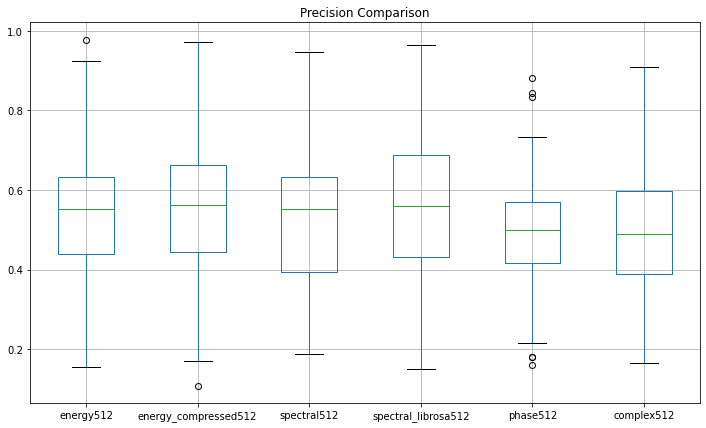

In [134]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(title='Precision Comparison')
df_pr.boxplot(ax=ax)

In [135]:
df_pr.describe()

energy512  energy_compressed512  spectral512  spectral_librosa512  \
count  77.000000             77.000000    77.000000            77.000000   
mean    0.544959              0.554951     0.540596             0.562085   
std     0.163080              0.184972     0.174740             0.186595   
min     0.154217              0.108696     0.187611             0.149758   
25%     0.438247              0.443038     0.394387             0.431217   
50%     0.551724              0.562500     0.552239             0.559814   
75%     0.632692              0.663564     0.633094             0.687092   
max     0.977507              0.971510     0.946454             0.964506   

        phase512  complex512  
count  77.000000   77.000000  
mean    0.488976    0.498750  
std     0.152260    0.163644  
min     0.159744    0.165997  
25%     0.416667    0.388206  
50%     0.500000    0.489960  
75%     0.568579    0.598527  
max     0.880228    0.908911

In [37]:
df_pr.max().sort_values()

7025       0.206677
616        0.271552
648310     0.283276
12795      0.283447
2687       0.309979
             ...   
933600     0.885965
1197420    0.895349
1141873    0.903614
26196      0.923611
874856     0.977507
Length: 77, dtype: float64

In [38]:
df_re.max().sort_values()

648310     0.308550
948021     0.414387
26196      0.510319
1041151    0.527052
369374     0.593750
             ...   
905269     0.927336
528293     0.937500
22809      0.968254
424562     0.974026
616        0.974576
Length: 77, dtype: float64

In [39]:
df_pr.min().sort_values()

424562     0.108696
116        0.149758
648310     0.154217
12795      0.165997
7025       0.170075
             ...   
1141873    0.684834
971842     0.708245
73256      0.750000
26196      0.842795
874856     0.880228
Length: 77, dtype: float64

In [40]:
df_re.min().sort_values()

23841      0.063380
424562     0.064935
73256      0.065744
549212     0.106870
1141873    0.141058
             ...   
905269     0.547866
34756      0.560000
31051      0.606667
528293     0.670455
12795      0.688623
Length: 77, dtype: float64

In [26]:
df.max().sort_values()

648310     0.388013
7025       0.390564
616        0.391941
625        0.448549
12795      0.454395
             ...   
933600     0.799242
1197420    0.802292
971842     0.805085
905269     0.807634
949071     0.816000
Length: 77, dtype: float64

In [27]:
df.min().sort_values()

23841     0.000000
424562    0.000000
38110     0.006472
73256     0.006873
6480      0.020202
            ...   
26196     0.133562
12795     0.139368
164898    0.144404
26908     0.151724
472817    0.181287
Length: 77, dtype: float64

In [113]:
df.sum(axis='columns').sort_values()/len(df.columns)

phase512                0.397891
energy_compressed512    0.465421
spectral512             0.533510
spectral_librosa512     0.533617
complex512              0.565923
energy512               0.574034
dtype: float64

In [44]:
novelties = ['energy-complex-join', 'spectral-complex-join',
            'energy-spectral-join', 'energy-complex-spectral-join']
song_ids = [file.split('-')[0] for file in os.listdir(results_path)]
tf_all_comp = compare_attribute_512(song_ids)
df_all_comp = pd.DataFrame(tf_all_comp)

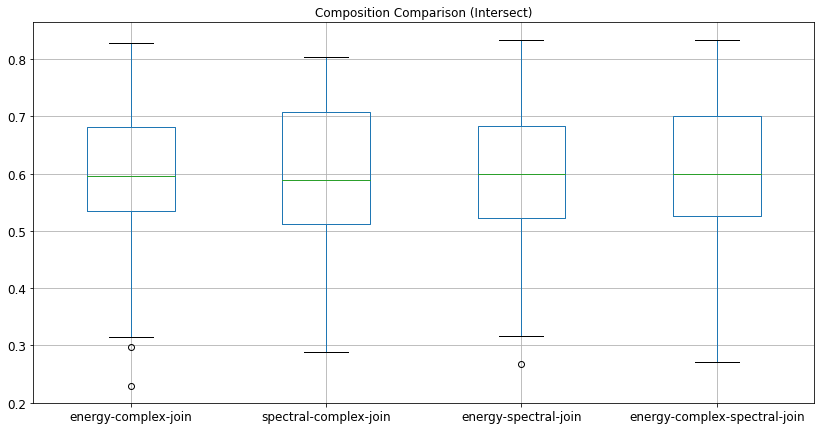

In [45]:
df_all_comp = df_all_comp.transpose()
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(title='Composition Comparison (Intersect)')
boxplot = df_all_comp.boxplot(ax=ax, fontsize=12, return_type='dict')
#ax.legend(boxplot["boxes"], ['complex-spectral-intersect', 'energy-spectral-intersect', 
#             'energy-complex-intersect', 'energy-complex-spectral-intersect', 
#             'energy-complex-join', 'spectral-complex-join', 'spectral_librosa-complex-join',
#            'energy-spectral-join', 'energy-complex-spectral-join', 'energy-spectral_librosa-join'], loc='upper right')
#ax

In [46]:
df_all_comp.describe()

energy-complex-join  spectral-complex-join  energy-spectral-join  \
count            77.000000              77.000000             77.000000   
mean              0.600264               0.593364              0.599415   
std               0.123685               0.124505              0.125468   
min               0.230041               0.288235              0.267550   
25%               0.534304               0.512270              0.522039   
50%               0.595485               0.589421              0.600252   
75%               0.682292               0.707904              0.683962   
max               0.827586               0.803204              0.833522   

       energy-complex-spectral-join  
count                     77.000000  
mean                       0.598849  
std                        0.129040  
min                        0.270544  
25%                        0.525618  
50%                        0.599418  
75%                        0.701316  
max                        0.834225

In [29]:
df_f.idxmin().sort_values()

energy_compressed256      23841
phase256                  25225
phase512                   2687
energy256                369374
phase2048                 38110
spectral2048              38110
energy2048                38110
complex256               424562
spectral_librosa256      424562
energy_compressed512     424562
spectral512              549212
complex512               648310
energy512                648310
energy_compressed2048     73256
spectral_librosa512       73256
spectral_librosa2048      73256
spectral_librosa1024     772255
phase1024                772255
complex2048              772255
complex1024              772255
spectral1024             772255
spectral256              772255
energy1024               772255
energy_compressed1024    888676
dtype: object